## *Import Libraries*

In [1]:
#!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## *Load Dataset*

In [3]:
tc=pd.read_csv('telecommunications_churn.csv')
tc

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


## ***EDA***

In [4]:
# Overview of the dataset

tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [5]:
tc.columns

Index(['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins',
       'evening_mins', 'night_mins', 'international_mins',
       'customer_service_calls', 'international_plan', 'day_calls',
       'day_charge', 'evening_calls', 'evening_charge', 'night_calls',
       'night_charge', 'international_calls', 'international_charge',
       'total_charge', 'churn'],
      dtype='object')

In [6]:
#Display Summary

tc.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [7]:
# Checking missingvalues

tc.isnull().sum()

account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

In [8]:
#checking datatypes

tc.dtypes

account_length              int64
voice_mail_plan             int64
voice_mail_messages         int64
day_mins                  float64
evening_mins              float64
night_mins                float64
international_mins        float64
customer_service_calls      int64
international_plan          int64
day_calls                   int64
day_charge                float64
evening_calls               int64
evening_charge            float64
night_calls                 int64
night_charge              float64
international_calls         int64
international_charge      float64
total_charge              float64
churn                       int64
dtype: object

In [9]:
# Checking Duplicates

tc.duplicated().sum()

np.int64(0)

## ***Data Visualization***

In [10]:
numerical_cols = tc.select_dtypes(include=np.number).columns

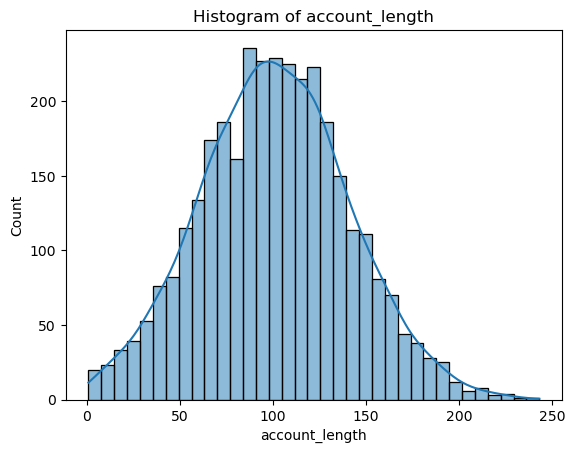

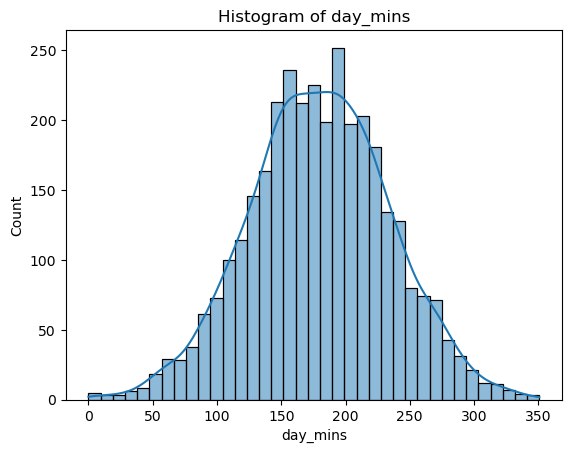

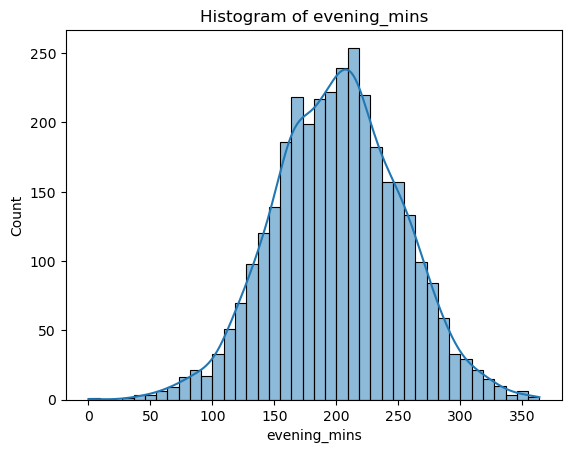

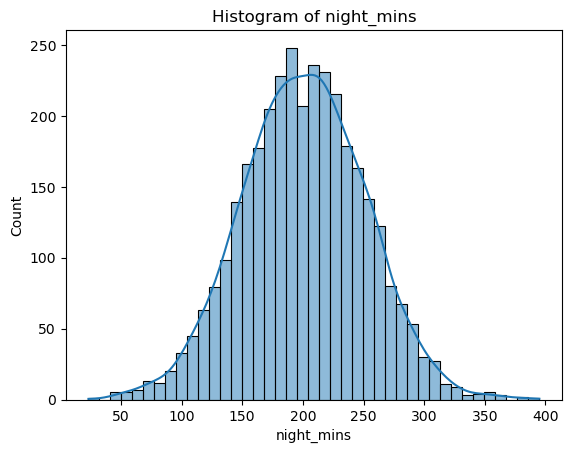

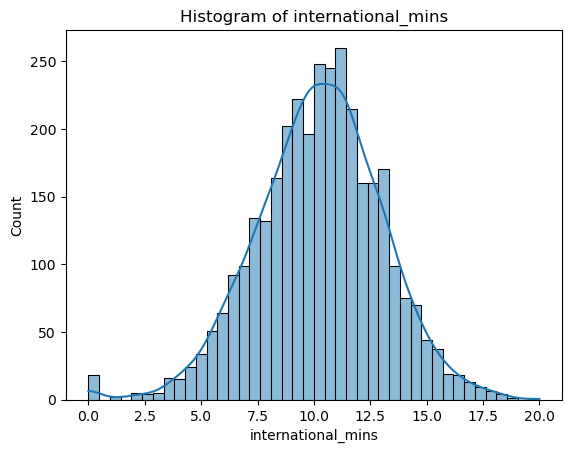

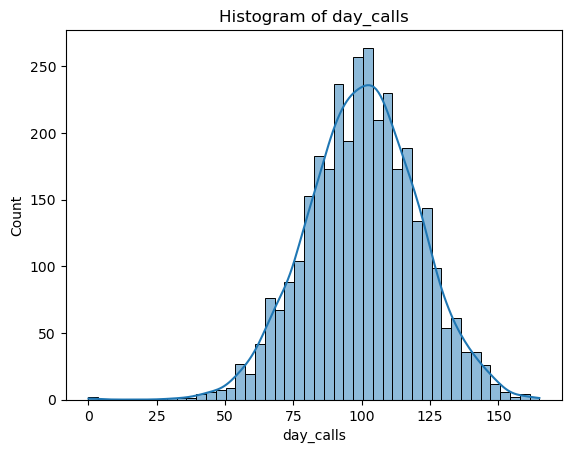

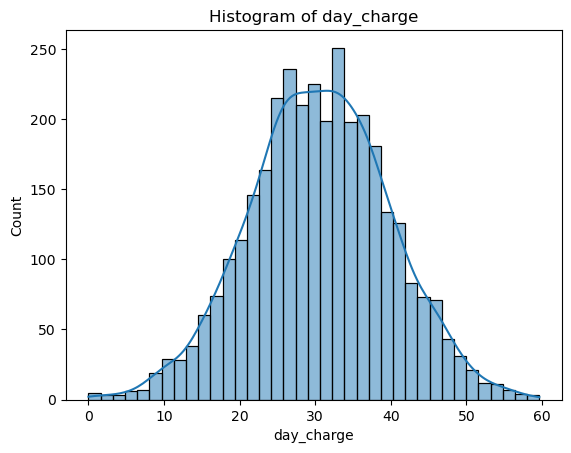

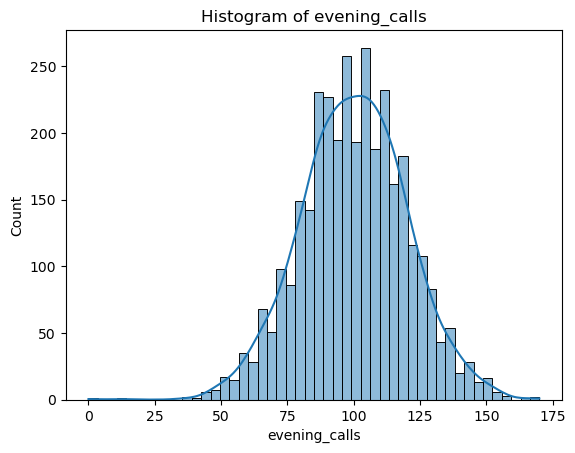

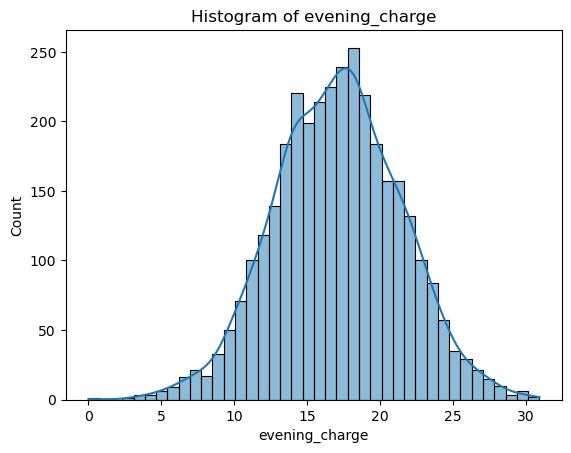

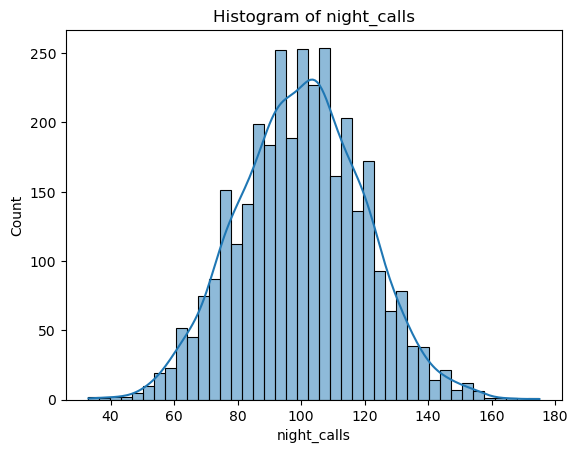

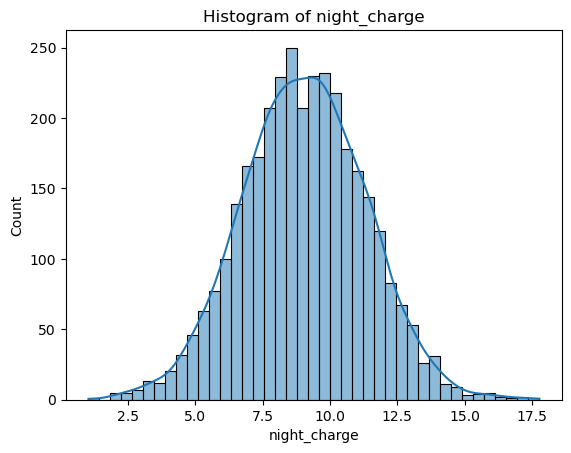

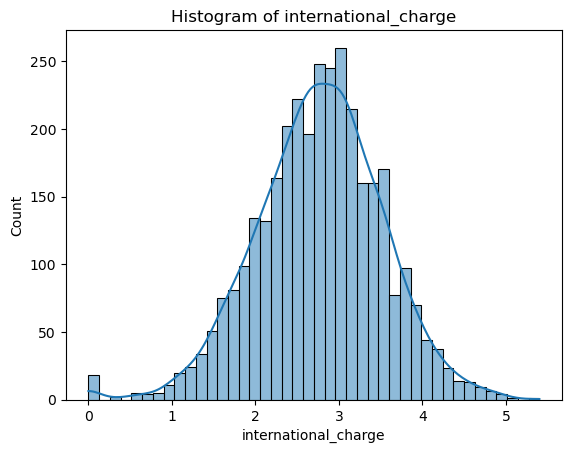

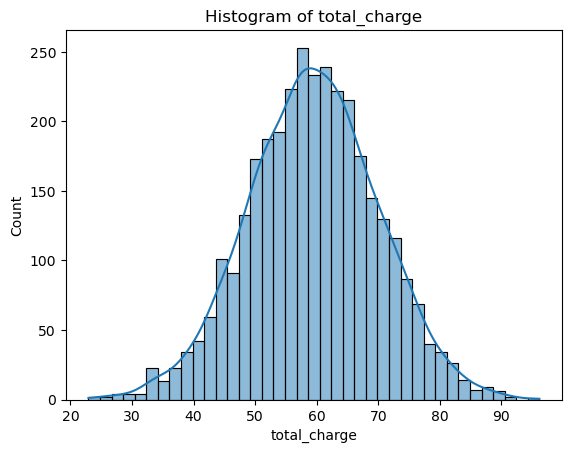

In [11]:
#Histogram
selected_features=['account_length','day_mins','evening_mins','night_mins','international_mins','day_calls','day_charge','evening_calls','evening_charge',
                  'night_calls','night_charge','international_charge','total_charge']
for col in selected_features:
    plt.figure()
    sns.histplot(tc[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

Text(0, 0.5, 'count')

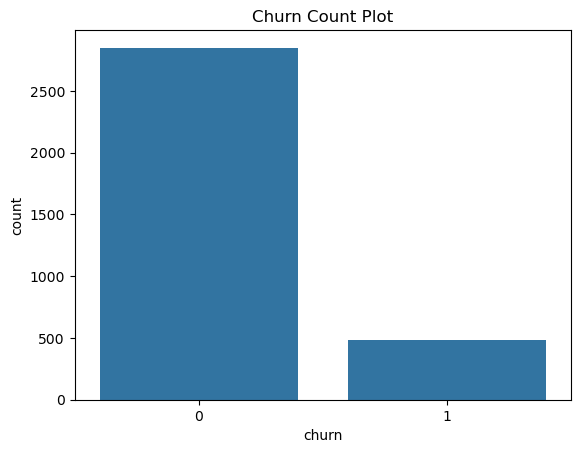

In [12]:
# Bar Chart
sns.countplot(x='churn', data=tc)
plt.title('Churn Count Plot')
plt.xlabel('churn')
plt.ylabel('count')

In [13]:
# correlation

tc.corr()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
account_length,1.000000,0.002918,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.024735,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,0.001454,0.016541
voice_mail_plan,0.002918,1.000000,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,0.006006,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,0.008585,-0.102148
voice_mail_messages,-0.004628,0.956927,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,0.008745,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,0.009766,-0.089728
day_mins,0.006216,-0.001684,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.049396,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,0.884754,0.205151
evening_mins,-0.006757,0.021545,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.019100,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.413143,0.092796
night_mins,-0.008955,0.006079,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,-0.028905,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,0.214257,0.035493
international_mins,0.009514,-0.001318,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.045871,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,0.054988,0.068239
customer_service_calls,-0.003796,-0.017824,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.024522,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,-0.019873,0.208750
international_plan,0.024735,0.006006,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,1.000000,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048415,0.259852
day_calls,0.038470,-0.011086,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,0.003755,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666,0.003673,0.018459


In [14]:
# calculates the number of outliers per column using IQR method
outliers_count = ((tc < (tc.quantile(0.25) - 1.5 * (tc.quantile(0.75) - tc.quantile(0.25)))) | (tc > (tc.quantile(0.75) + 1.5 * (tc.quantile(0.75) - tc.quantile(0.25))))).sum()
outliers_count

account_length             18
voice_mail_plan             0
voice_mail_messages         1
day_mins                   25
evening_mins               24
night_mins                 30
international_mins         46
customer_service_calls    267
international_plan        323
day_calls                  23
day_charge                 25
evening_calls              20
evening_charge             24
night_calls                22
night_charge               30
international_calls        78
international_charge       49
total_charge               27
churn                     483
dtype: int64

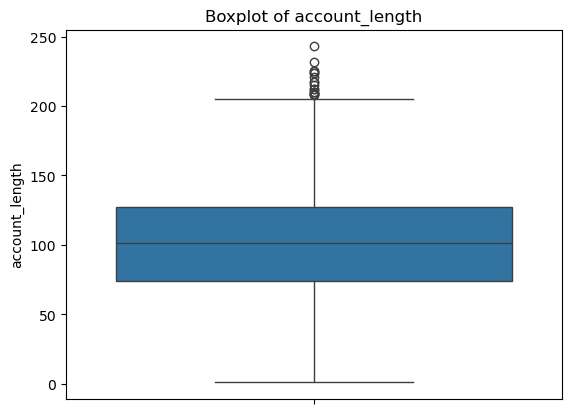

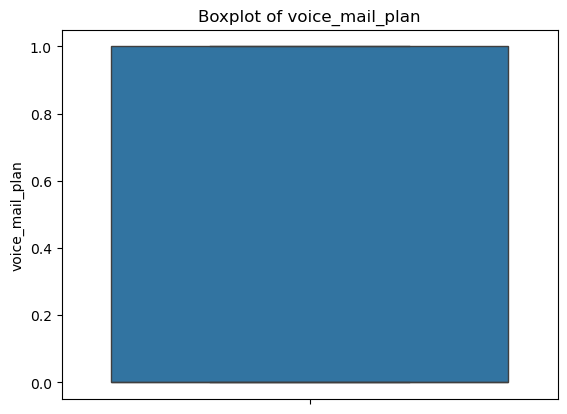

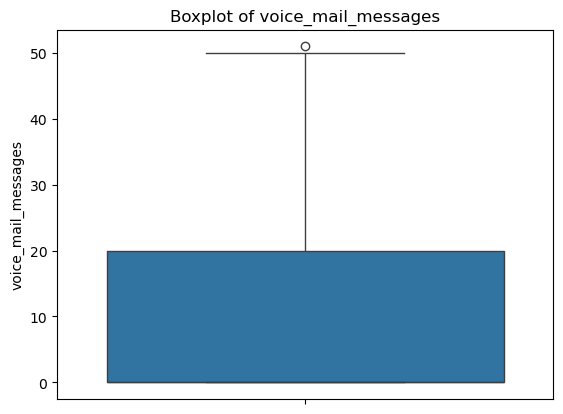

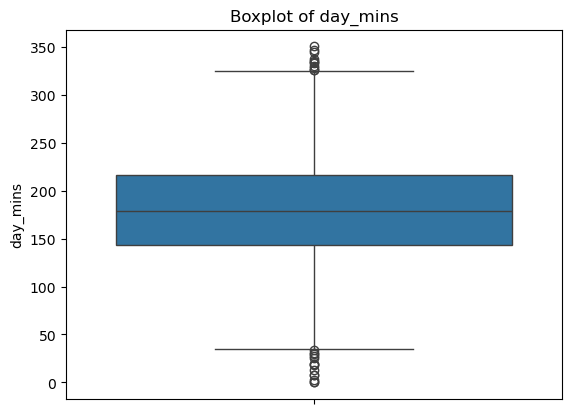

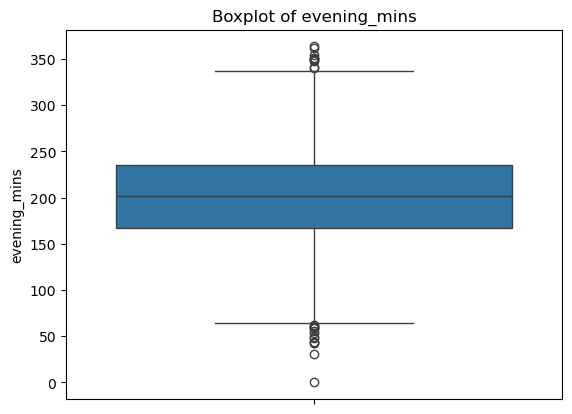

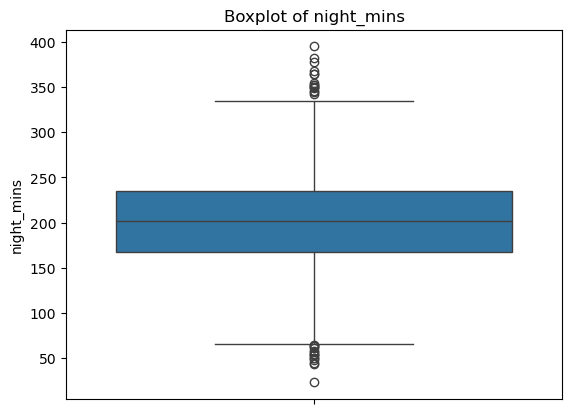

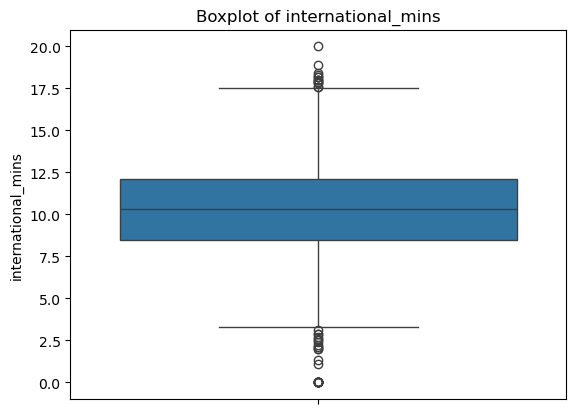

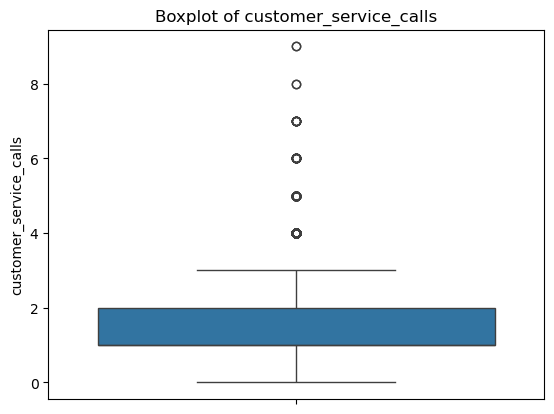

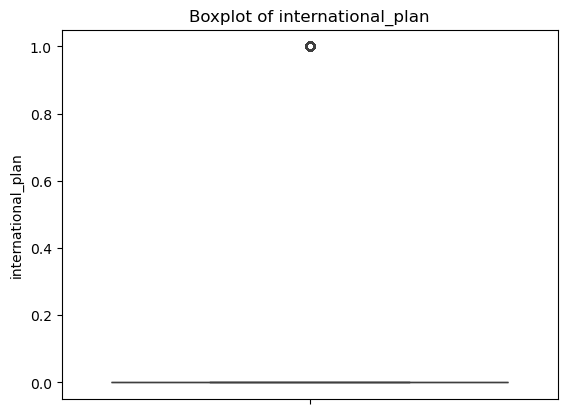

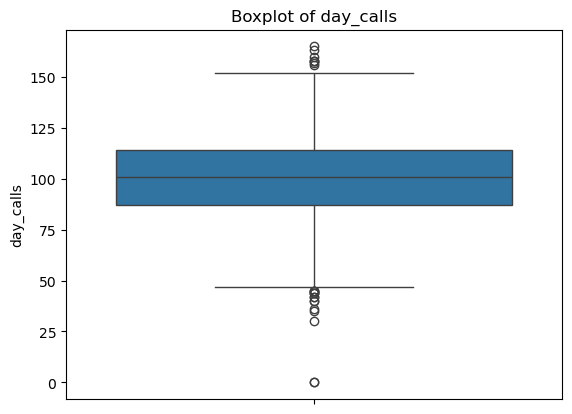

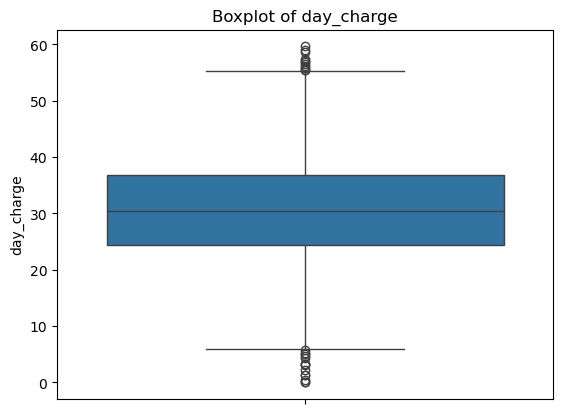

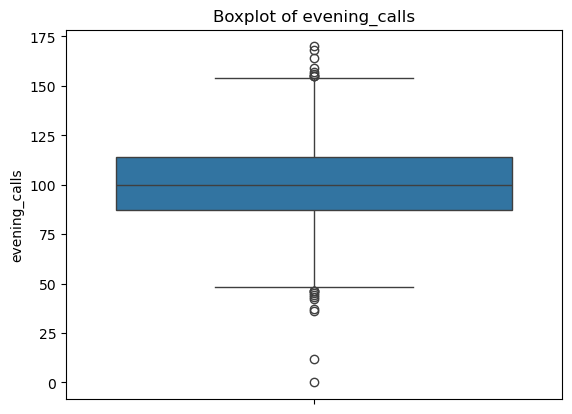

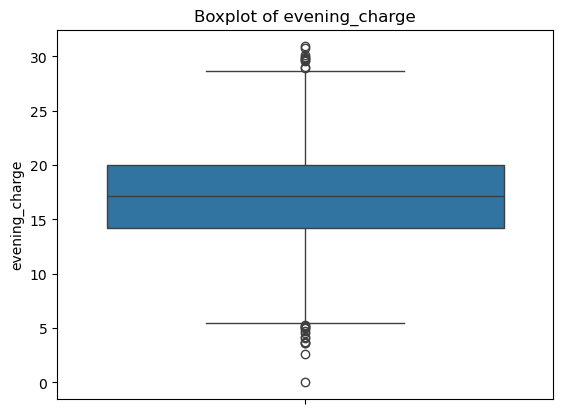

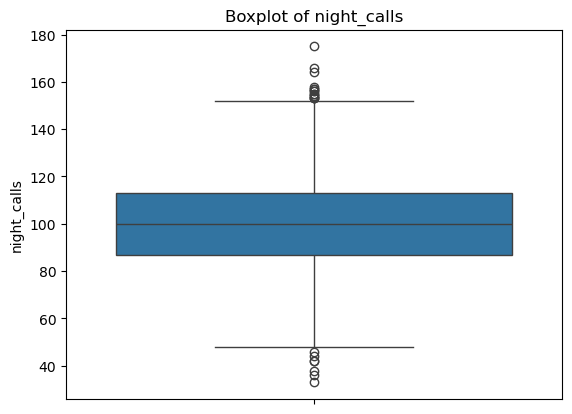

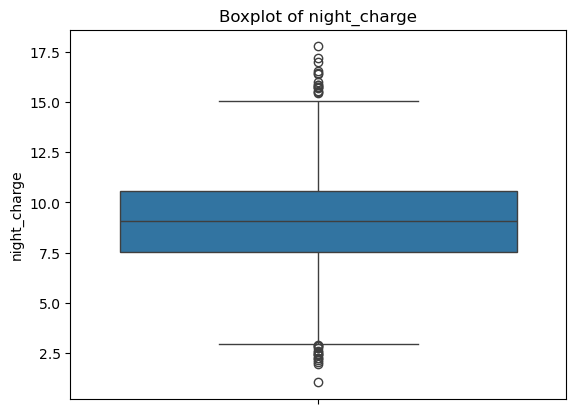

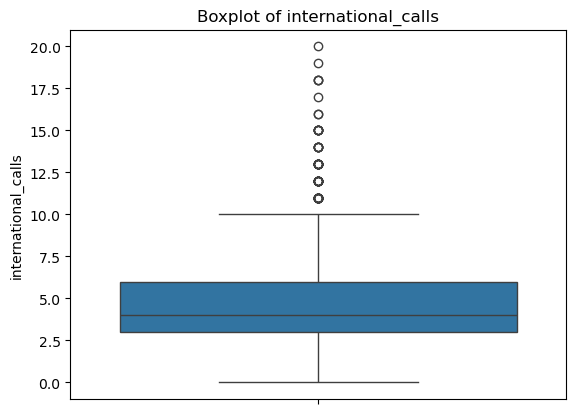

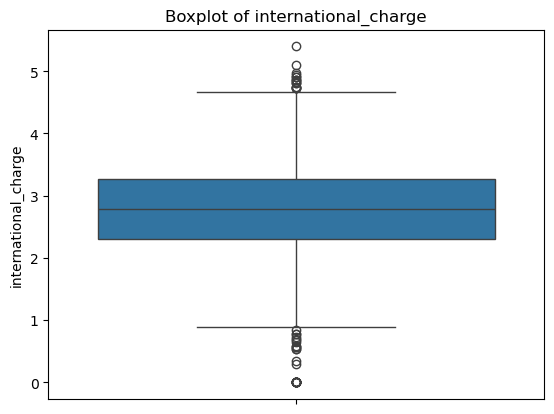

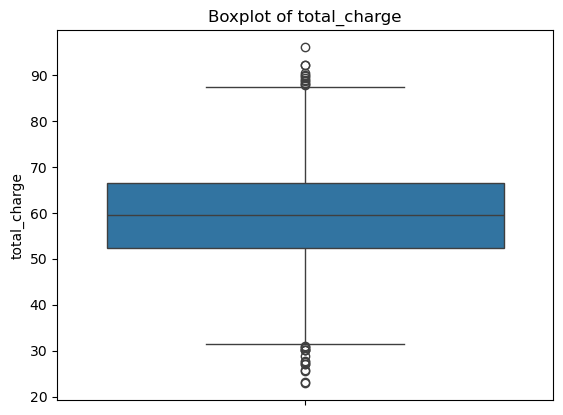

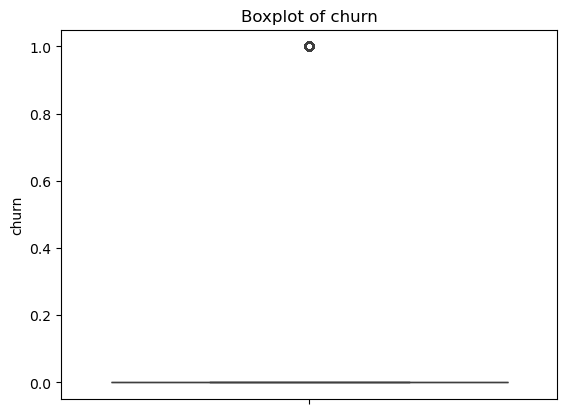

In [15]:
# Box Plot

for col in numerical_cols:
  plt.figure()
  sns.boxplot(tc[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [16]:
# Treating Outlier
def outlier_Detection(tc,columns):
    for col in columns:
        Q1=tc[col].quantile(0.25)
        Q3=tc[col].quantile(0.75)
        iqr=Q3-Q1
        lower=Q1-1.5*iqr
        upper=Q3+1.5*iqr
        tc[col]=np.where(tc[col]>upper,upper,np.where(tc[col]<lower,lower,tc[col]))
    return tc  

In [17]:
outlier_Detection(tc,['account_length', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins','customer_service_calls', 'day_calls','day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge'])

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128.0,1,25.0,265.1,197.40,244.7,10.0,1.0,0,110.0,45.07,99.0,16.78,91.0,11.01,3.0,2.70,75.56,0
1,107.0,1,26.0,161.6,195.50,254.4,13.7,1.0,0,123.0,27.47,103.0,16.62,103.0,11.45,3.0,3.70,59.24,0
2,137.0,0,0.0,243.4,121.20,162.6,12.2,0.0,0,114.0,41.38,110.0,10.30,104.0,7.32,5.0,3.29,62.29,0
3,84.0,0,0.0,299.4,63.55,196.9,6.6,2.0,1,71.0,50.90,88.0,5.40,89.0,8.86,7.0,1.78,66.80,0
4,75.0,0,0.0,166.7,148.30,186.9,10.1,3.0,1,113.0,28.34,122.0,12.61,121.0,8.41,3.0,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192.0,1,36.0,156.2,215.50,279.1,9.9,2.0,0,77.0,26.55,126.0,18.32,83.0,12.56,6.0,2.67,60.10,0
3329,68.0,0,0.0,231.1,153.40,191.3,9.6,3.0,0,57.0,39.29,55.0,13.04,123.0,8.61,4.0,2.59,63.53,0
3330,28.0,0,0.0,180.8,288.80,191.9,14.1,2.0,0,109.0,30.74,58.0,24.55,91.0,8.64,6.0,3.81,67.74,0
3331,184.0,0,0.0,213.8,159.60,139.2,5.0,2.0,1,105.0,36.35,84.0,13.57,137.0,6.26,10.0,1.35,57.53,0


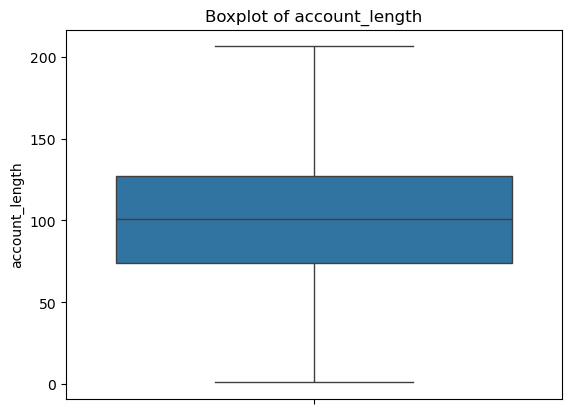

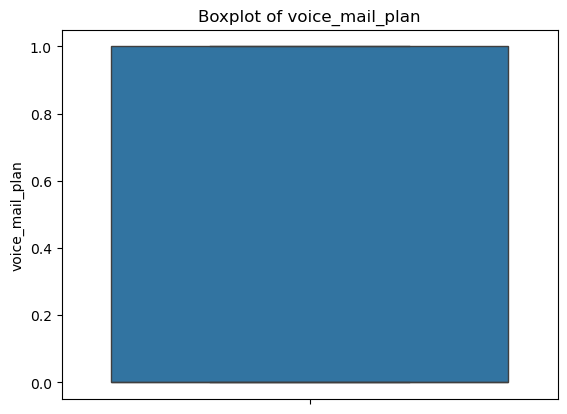

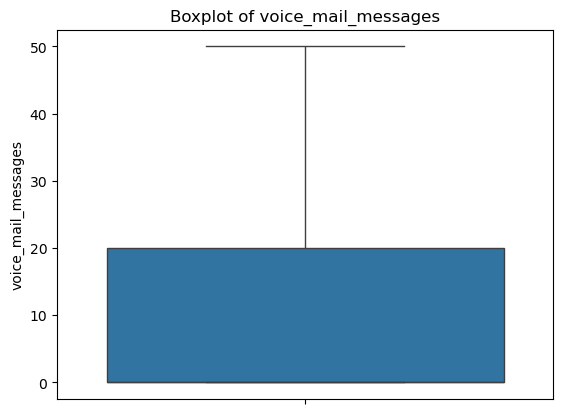

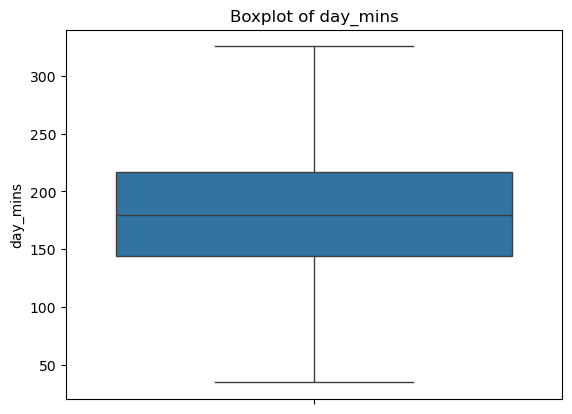

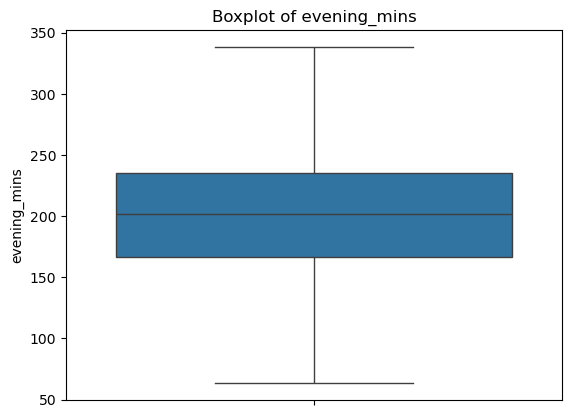

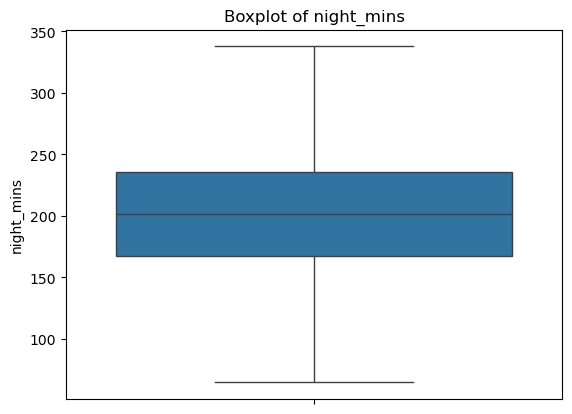

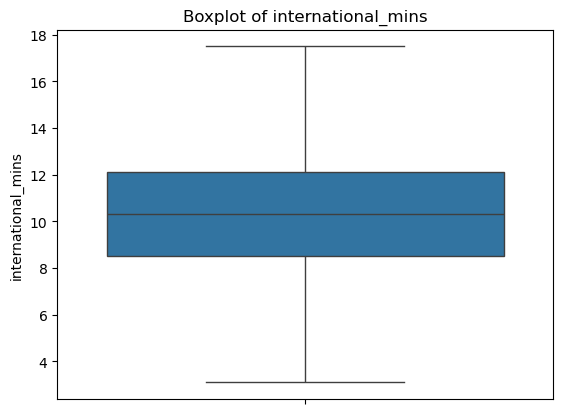

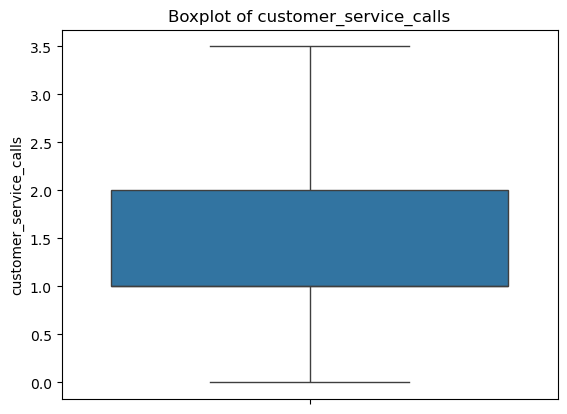

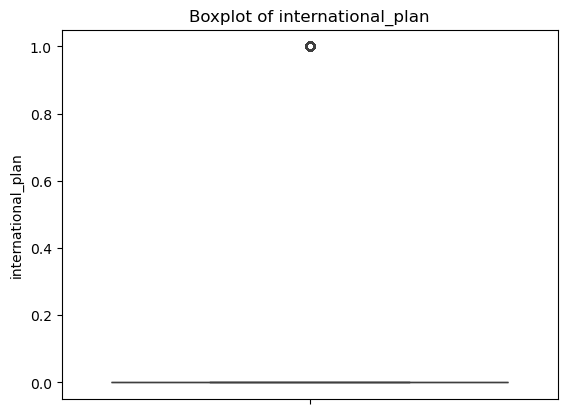

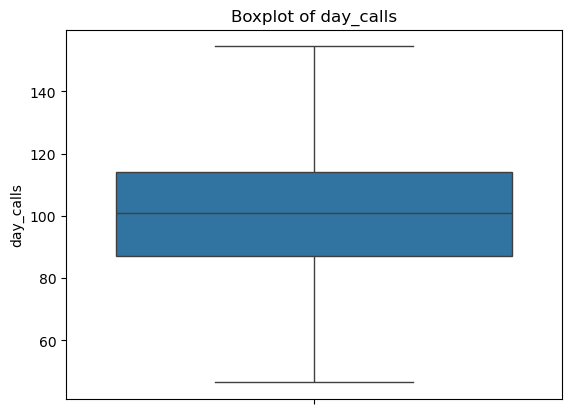

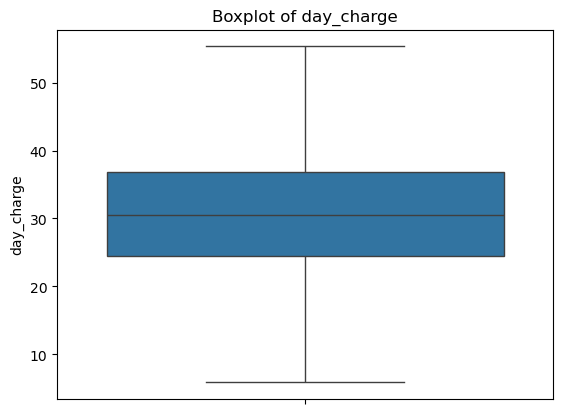

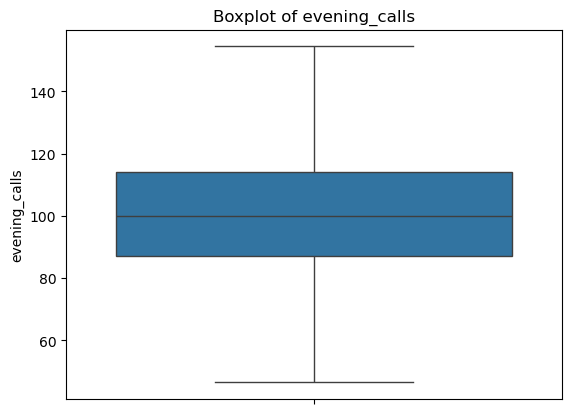

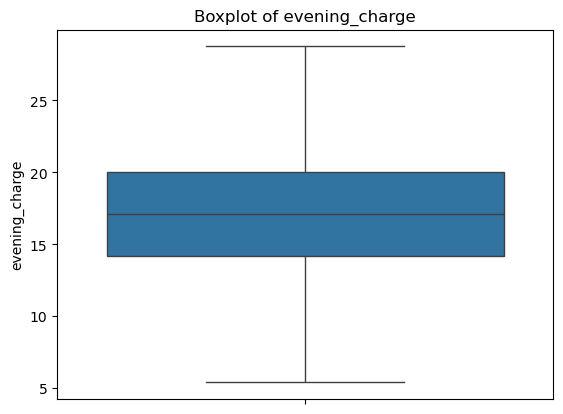

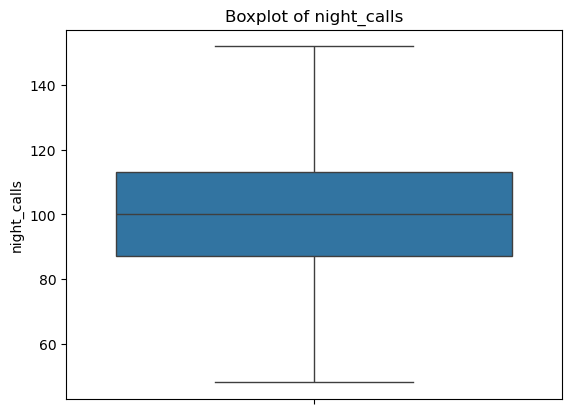

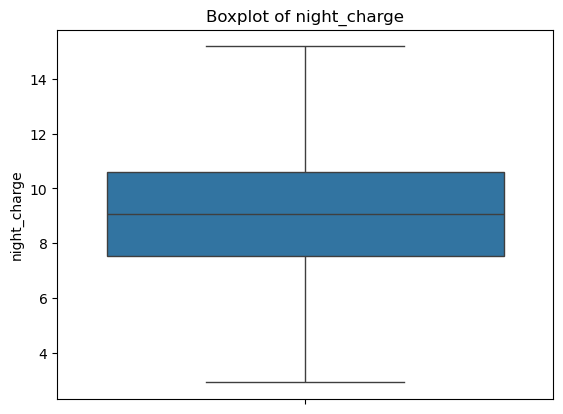

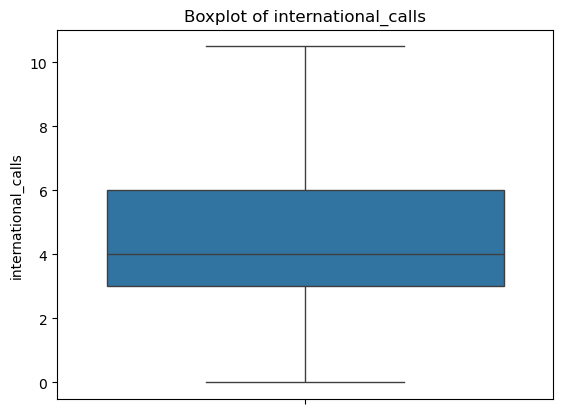

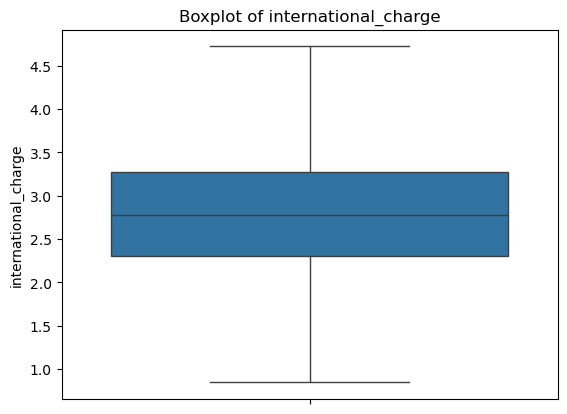

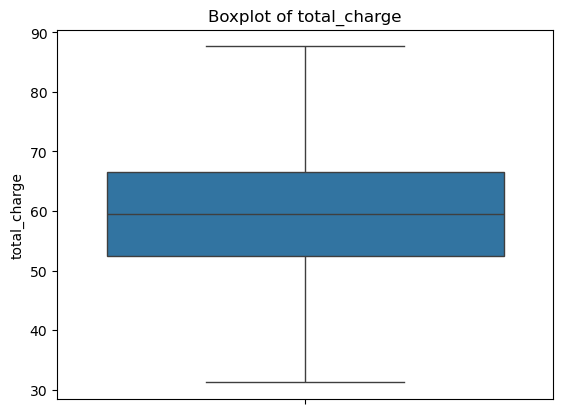

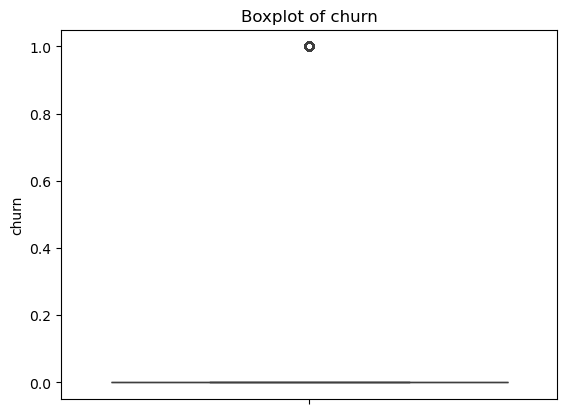

In [18]:
# Box Plot after removing outliers

for col in numerical_cols:
  plt.figure()
  sns.boxplot(tc[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [19]:
# calculates the number of outliers per column using IQR method
outliers_count = ((tc < (tc.quantile(0.25) - 1.5 * (tc.quantile(0.75) - tc.quantile(0.25)))) | (tc > (tc.quantile(0.75) + 1.5 * (tc.quantile(0.75) - tc.quantile(0.25))))).sum()
outliers_count

account_length              0
voice_mail_plan             0
voice_mail_messages         0
day_mins                    0
evening_mins                0
night_mins                  0
international_mins          0
customer_service_calls      0
international_plan        323
day_calls                   0
day_charge                  0
evening_calls               0
evening_charge              0
night_calls                 0
night_charge                0
international_calls         0
international_charge        0
total_charge                0
churn                     483
dtype: int64

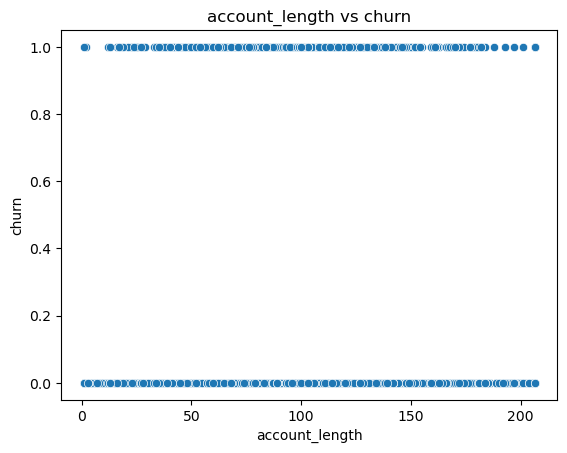

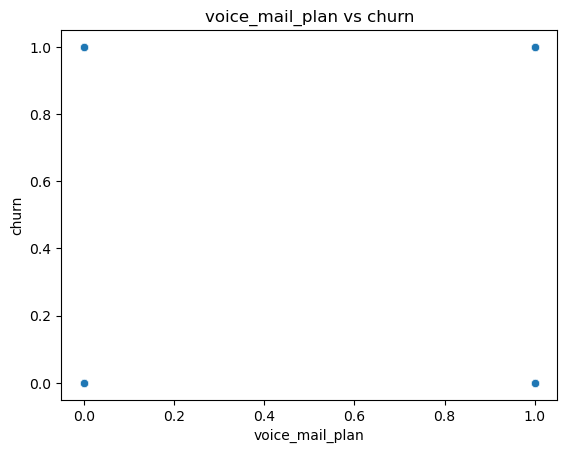

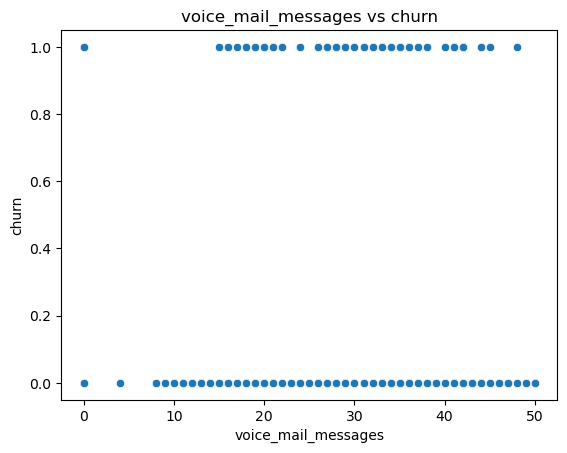

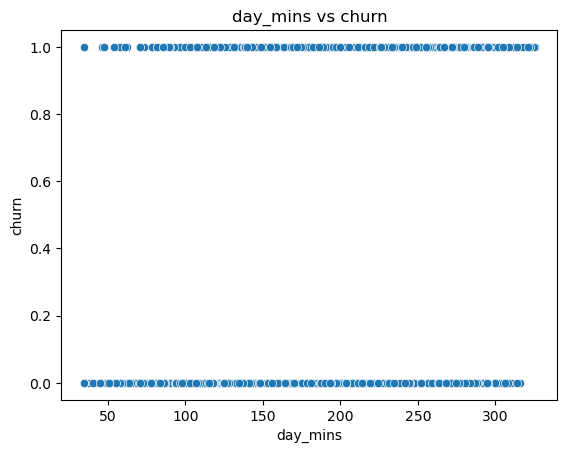

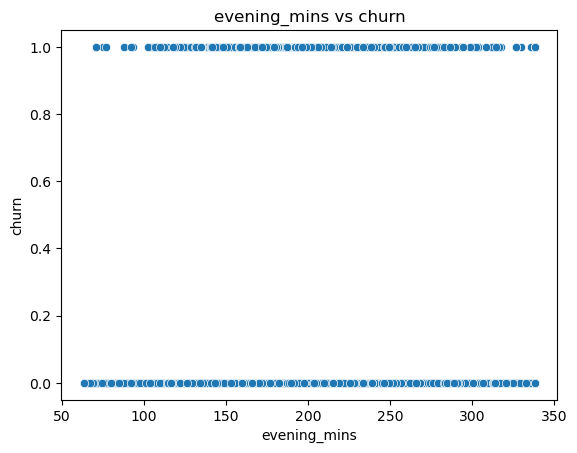

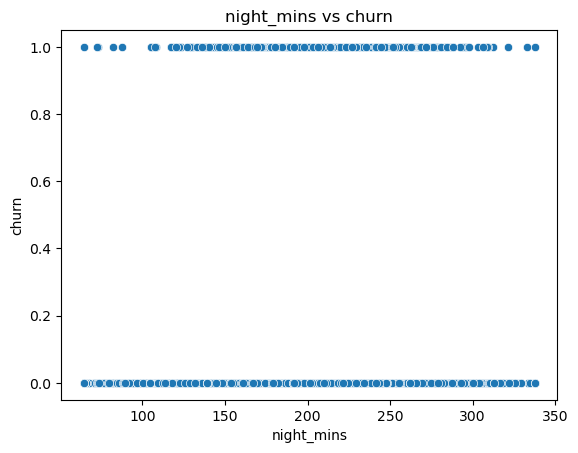

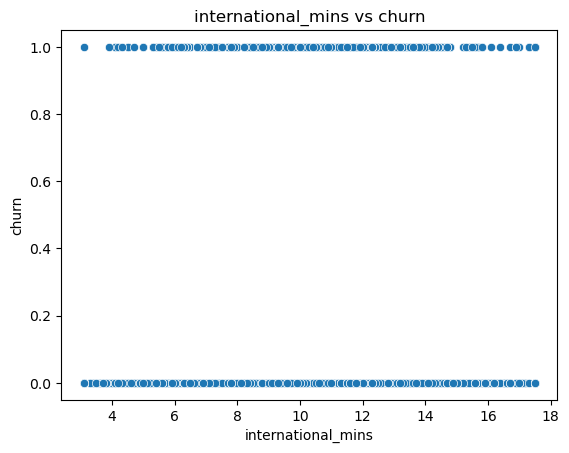

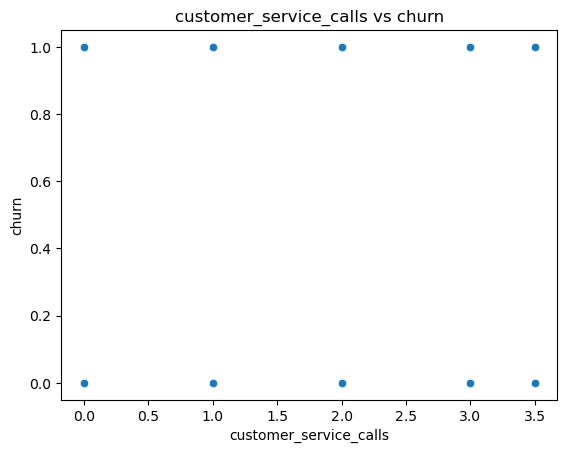

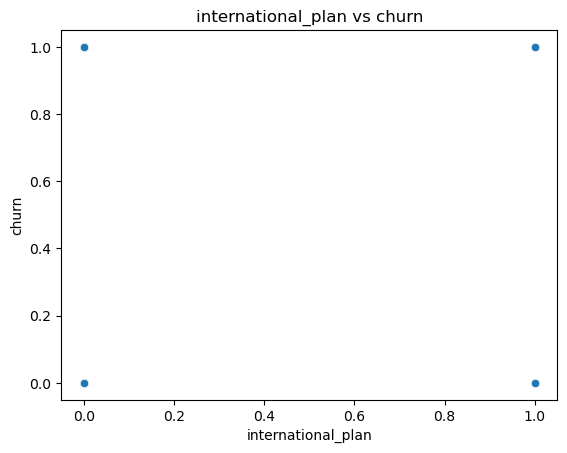

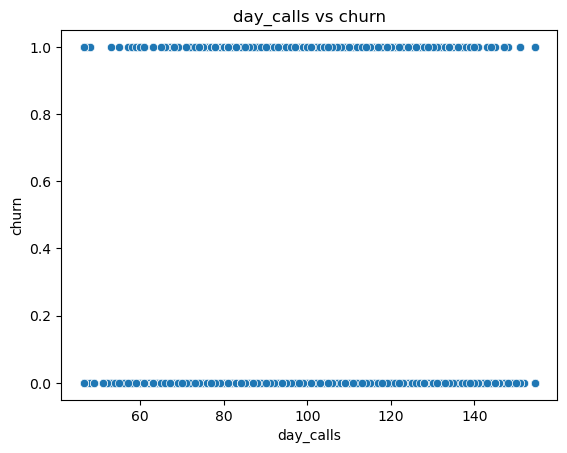

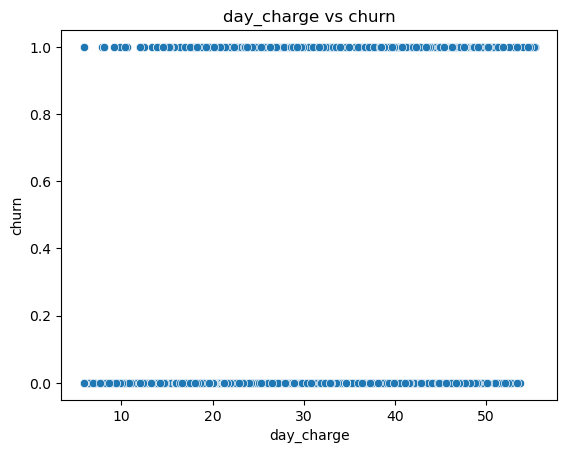

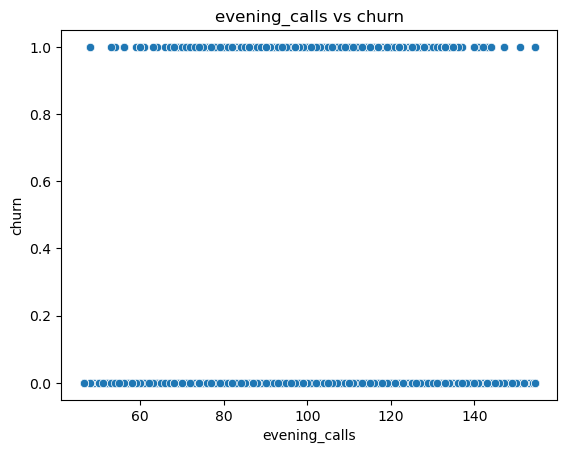

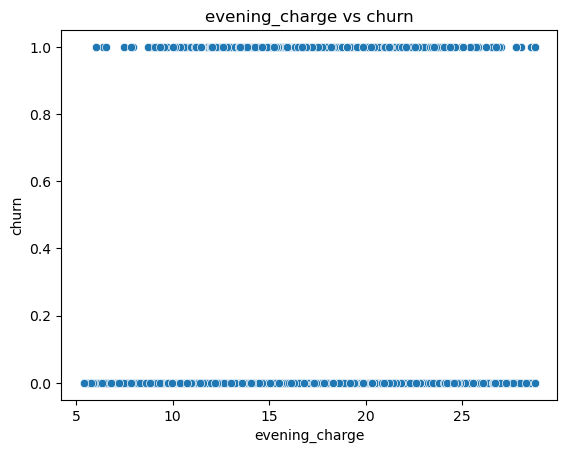

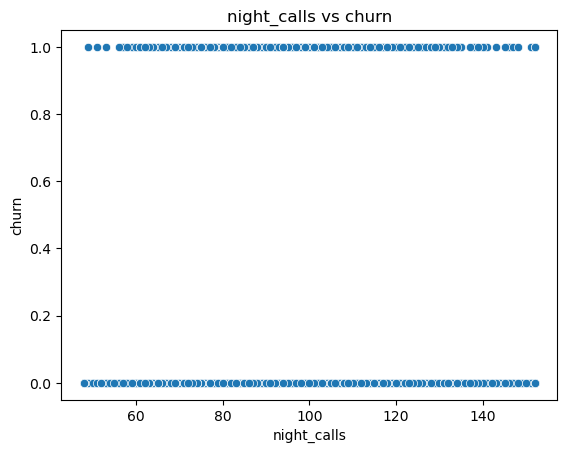

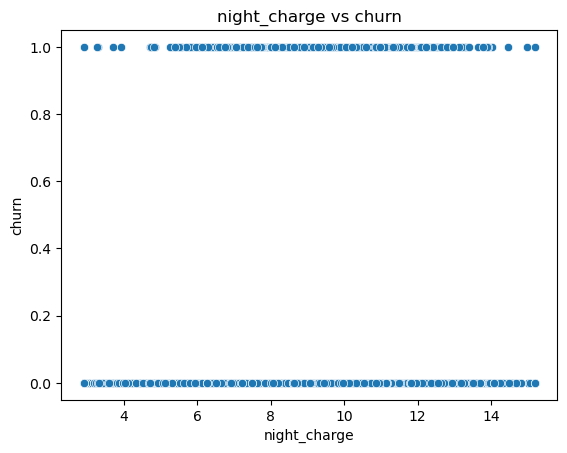

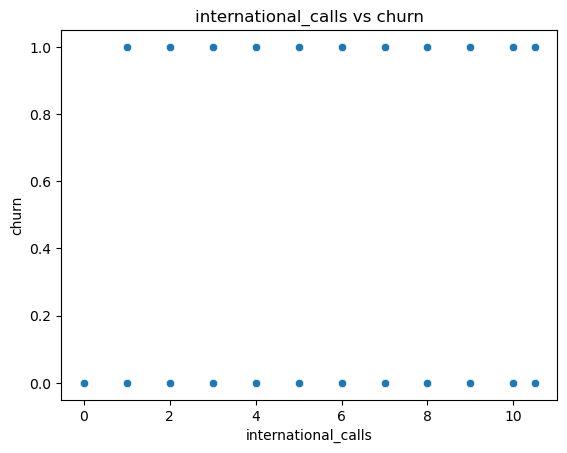

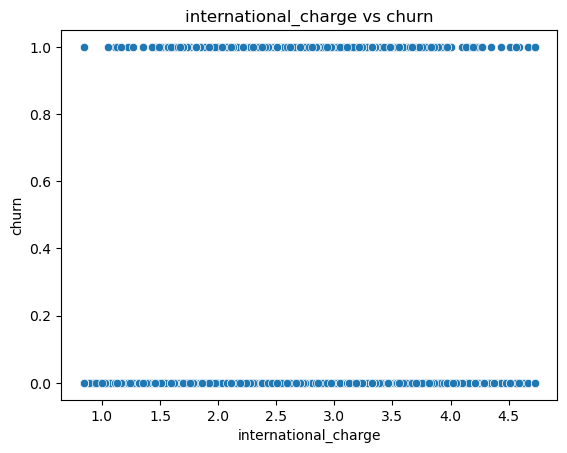

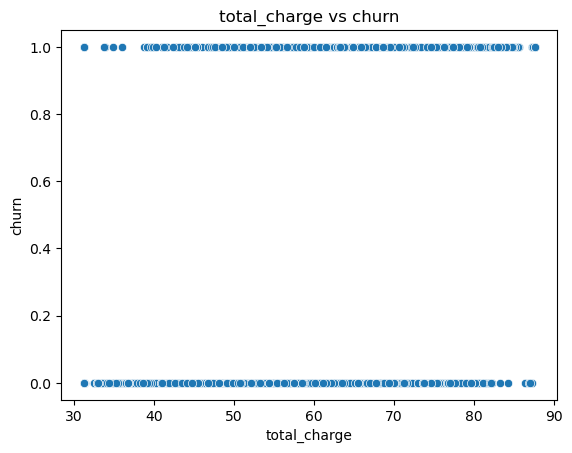

In [20]:
# Scatter plot
target= 'churn'
features= [col for col in tc.columns if col !=target]
for feature in features:
    sns.scatterplot(data=tc, x=feature, y=target)
    plt.title(f"{feature} vs {target}")
    plt.show()

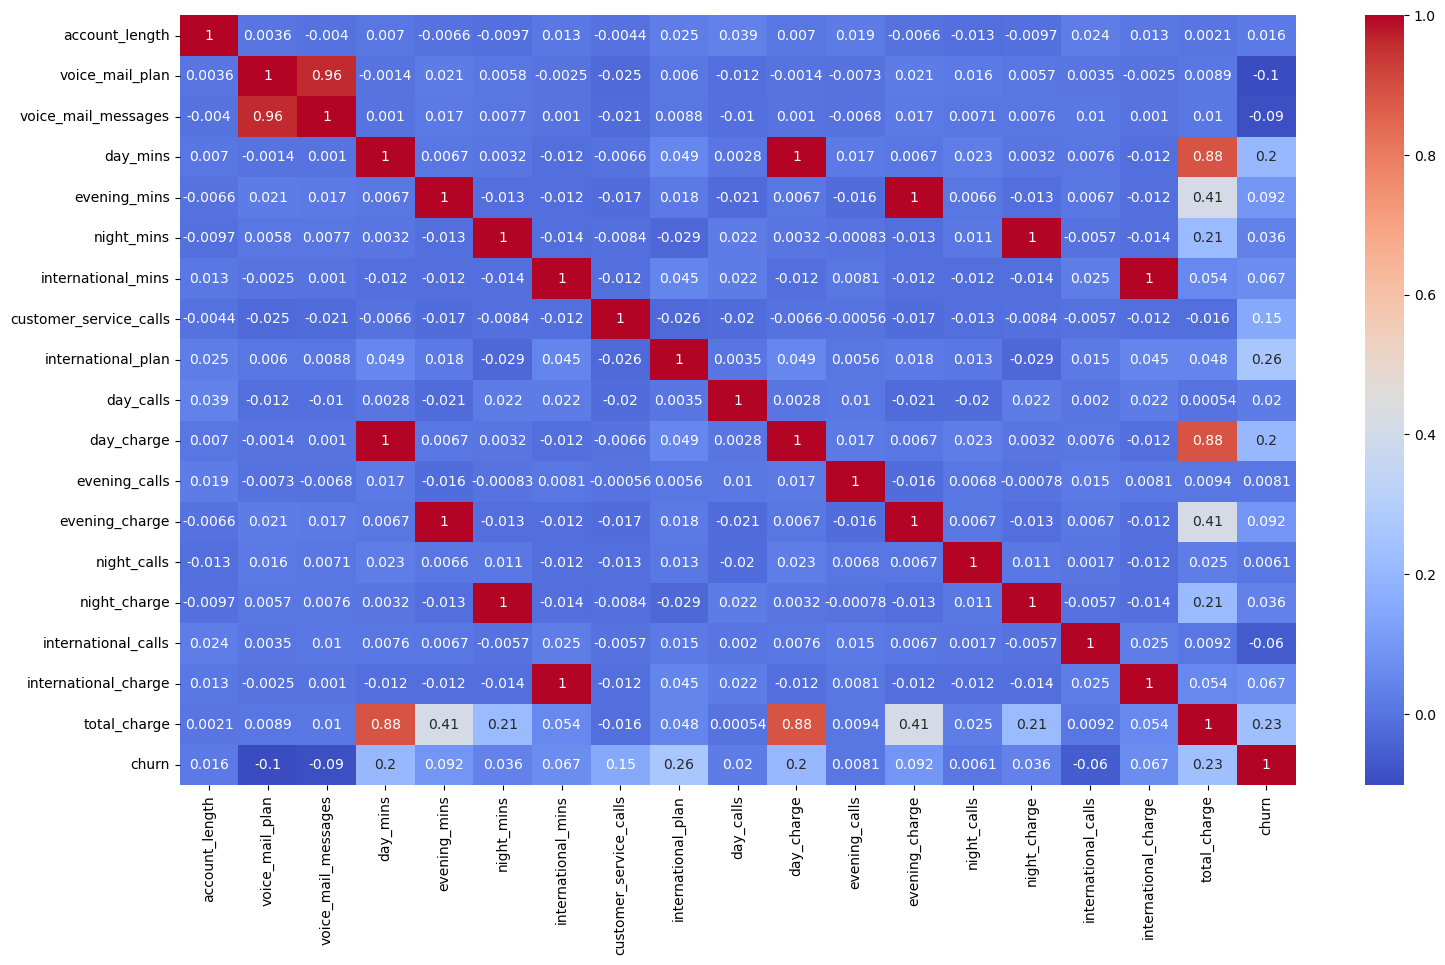

In [21]:
# Heatmap

plt.figure(figsize=(18,10))
sns.heatmap(tc.corr(),annot=True,cmap='coolwarm')
plt.show()

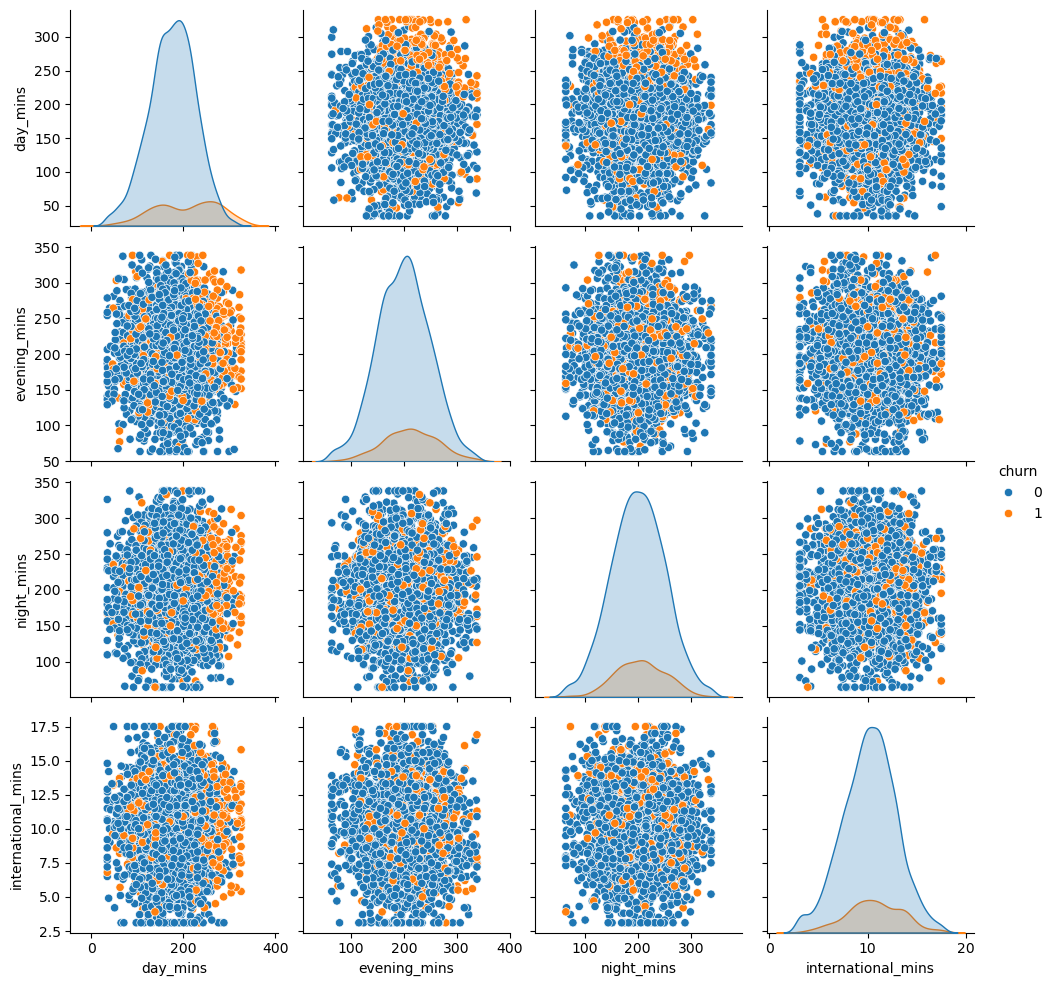

In [22]:
# Pair plot

selected_features=['day_mins','evening_mins','night_mins','international_mins','churn']
sns.pairplot(tc[selected_features],hue='churn')
plt.show()

## *Feature Engineering*

In [23]:
# Create the interaction feature

tc['avg_day_call_charge'] = tc['day_mins'] + tc['day_calls']+tc['day_charge']
tc['avg_evening_call_charge']=tc['evening_mins']+tc['evening_calls']+tc['evening_charge']
tc['avg_night_call_charge']=tc['night_mins']+tc['night_calls']+tc['night_charge']

In [24]:
tc.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,avg_day_call_charge,avg_evening_call_charge,avg_night_call_charge
0,128.0,1,25.0,265.1,197.40,244.7,10.0,1.0,0,110.0,...,16.78,91.0,11.01,3.0,2.70,75.56,0,420.17,313.18,346.71
1,107.0,1,26.0,161.6,195.50,254.4,13.7,1.0,0,123.0,...,16.62,103.0,11.45,3.0,3.70,59.24,0,312.07,315.12,368.85
2,137.0,0,0.0,243.4,121.20,162.6,12.2,0.0,0,114.0,...,10.30,104.0,7.32,5.0,3.29,62.29,0,398.78,241.50,273.92
3,84.0,0,0.0,299.4,63.55,196.9,6.6,2.0,1,71.0,...,5.40,89.0,8.86,7.0,1.78,66.80,0,421.30,156.95,294.76
4,75.0,0,0.0,166.7,148.30,186.9,10.1,3.0,1,113.0,...,12.61,121.0,8.41,3.0,2.73,52.09,0,308.04,282.91,316.31


In [25]:
# Normalization

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
ts = pd.DataFrame(scalar.fit_transform(tc.drop(columns=['churn'])),columns=tc.columns[:-1])
ts['churn']=tc['churn']

In [26]:
ts

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,avg_day_call_charge,avg_evening_call_charge
0,0.618005,1.0,0.50,0.792469,0.487082,0.659407,0.479167,0.285714,0.0,0.587963,...,0.486111,0.487158,0.413462,0.659202,0.285714,0.478093,0.785993,0,0.494152,0.588609
1,0.515815,1.0,0.52,0.436554,0.480167,0.694912,0.736111,0.285714,0.0,0.708333,...,0.523148,0.480308,0.528846,0.695033,0.285714,0.735825,0.496631,0,0.499000,0.648048
2,0.661800,0.0,0.00,0.717847,0.209789,0.358895,0.631944,0.000000,0.0,0.625000,...,0.587963,0.209760,0.538462,0.358713,0.476190,0.630155,0.550709,0,0.315015,0.393189
3,0.403893,0.0,0.00,0.910420,0.000000,0.484444,0.243056,0.571429,1.0,0.226852,...,0.384259,0.000000,0.394231,0.484121,0.666667,0.240979,0.630674,0,0.103714,0.449138
4,0.360097,0.0,0.00,0.454092,0.308406,0.447840,0.486111,0.857143,1.0,0.615741,...,0.699074,0.308647,0.701923,0.447476,0.285714,0.485825,0.369858,0,0.418504,0.506994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.929440,1.0,0.72,0.417985,0.552948,0.785322,0.472222,0.571429,0.0,0.282407,...,0.736111,0.553082,0.336538,0.785423,0.571429,0.470361,0.511879,0,0.610711,0.663646
3329,0.326034,0.0,0.00,0.675550,0.326965,0.463946,0.451389,0.857143,0.0,0.097222,...,0.078704,0.327055,0.721154,0.463762,0.380952,0.449742,0.572695,0,0.264882,0.524713
3330,0.131387,0.0,0.00,0.502579,0.819687,0.466142,0.763889,0.571429,0.0,0.578704,...,0.106481,0.819777,0.413462,0.466205,0.571429,0.764175,0.647340,0,0.639526,0.440493
3331,0.890511,0.0,0.00,0.616059,0.349527,0.273243,0.131944,0.571429,1.0,0.541667,...,0.347222,0.349743,0.855769,0.272394,0.952381,0.130155,0.466312,0,0.354176,0.416116


## *Import Libraries*

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.cluster import KMeans

In [28]:
x=ts.drop(['churn'],axis=1)
y=ts['churn']

In [29]:
x.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,avg_day_call_charge,avg_evening_call_charge
0,0.618005,1.0,0.50,0.792469,0.487082,0.659407,0.479167,0.285714,0.0,0.587963,0.792476,0.486111,0.487158,0.413462,0.659202,0.285714,0.478093,0.785993,0.494152,0.588609
1,0.515815,1.0,0.52,0.436554,0.480167,0.694912,0.736111,0.285714,0.0,0.708333,0.436489,0.523148,0.480308,0.528846,0.695033,0.285714,0.735825,0.496631,0.499000,0.648048
2,0.661800,0.0,0.00,0.717847,0.209789,0.358895,0.631944,0.000000,0.0,0.625000,0.717840,0.587963,0.209760,0.538462,0.358713,0.476190,0.630155,0.550709,0.315015,0.393189
3,0.403893,0.0,0.00,0.910420,0.000000,0.484444,0.243056,0.571429,1.0,0.226852,0.910396,0.384259,0.000000,0.394231,0.484121,0.666667,0.240979,0.630674,0.103714,0.449138
4,0.360097,0.0,0.00,0.454092,0.308406,0.447840,0.486111,0.857143,1.0,0.615741,0.454086,0.699074,0.308647,0.701923,0.447476,0.285714,0.485825,0.369858,0.418504,0.506994


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [31]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.2 , random_state = 1)

## *Model Building* 

In [32]:
# Automatic Model Building

def prediction(model):
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    
    train_acc = model.score(xtrain, ytrain)
    test_acc = model.score(xtest, ytest)
    print(f"Train Accuracy:{model.score(xtrain,ytrain)}")
    print(f"Test Accuracy:{model.score(xtrain,ytrain)}")
    print(classification_report(ytest,y_pred))

    return test_acc

In [33]:
# Using Logistic Regression

prediction(LogisticRegression())

Train Accuracy:0.8603603603603603
Test Accuracy:0.8603603603603603
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2285
           1       0.59      0.16      0.25       382

    accuracy                           0.86      2667
   macro avg       0.73      0.57      0.59      2667
weighted avg       0.83      0.86      0.83      2667



0.863517060367454

In [34]:
# Using Support Vector Machine

prediction(SVC())

Train Accuracy:0.9234234234234234
Test Accuracy:0.9234234234234234
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2285
           1       0.84      0.35      0.49       382

    accuracy                           0.90      2667
   macro avg       0.87      0.67      0.72      2667
weighted avg       0.89      0.90      0.88      2667



0.8965129358830146

In [35]:
# Using Decision Tree Classifier

prediction(DecisionTreeClassifier())

Train Accuracy:1.0
Test Accuracy:1.0
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2285
           1       0.80      0.83      0.82       382

    accuracy                           0.95      2667
   macro avg       0.89      0.90      0.89      2667
weighted avg       0.95      0.95      0.95      2667



0.9460067491563554

In [36]:
# Using Random Forest Classifier

prediction(RandomForestClassifier())

Train Accuracy:1.0
Test Accuracy:1.0
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2285
           1       0.94      0.72      0.81       382

    accuracy                           0.95      2667
   macro avg       0.95      0.85      0.89      2667
weighted avg       0.95      0.95      0.95      2667



0.952755905511811

In [37]:
# Using KNN

prediction( KNeighborsClassifier())

  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.

Train Accuracy:0.918918918918919
Test Accuracy:0.918918918918919
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      2285
           1       0.74      0.30      0.43       382

    accuracy                           0.88      2667
   macro avg       0.82      0.64      0.68      2667
weighted avg       0.87      0.88      0.86      2667



0.884514435695538

In [38]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier()
}

# Variable to store the best model and its accuracy
best_model = None
best_accuracy = 0
model_accuracies = {}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    acc = prediction(model)  # Assuming prediction function gives accuracy for the model
    model_accuracies[name] = acc
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model  # Store the actual model, not the name
print(f"Best Model: {type(best_model).__name__}")
print(f"with accuracy: {best_accuracy}")

Evaluating Logistic Regression...
Train Accuracy:0.8603603603603603
Test Accuracy:0.8603603603603603
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2285
           1       0.59      0.16      0.25       382

    accuracy                           0.86      2667
   macro avg       0.73      0.57      0.59      2667
weighted avg       0.83      0.86      0.83      2667

Evaluating Random Forest...
Train Accuracy:1.0
Test Accuracy:1.0
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2285
           1       0.93      0.69      0.79       382

    accuracy                           0.95      2667
   macro avg       0.94      0.84      0.88      2667
weighted avg       0.95      0.95      0.95      2667

Evaluating SVM...
Train Accuracy:0.9234234234234234
Test Accuracy:0.9234234234234234
              precision    recall  f1-score   support

           0       0.90      0.99      0

# *Boost the accuracy*

In [39]:
# Cross-validation for LightGBM

lgbm_model = lgb.LGBMClassifier()

In [40]:
lgbm_cv_scores = cross_val_score(lgbm_model, x, y, cv=5, scoring='accuracy')

[LightGBM] [Info] Number of positive: 386, number of negative: 2280
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144786 -> initscore=-1.776093
[LightGBM] [Info] Start training from score -1.776093
[LightGBM] [Info] Number of positive: 386, number of negative: 2280
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3103
[LightGBM] [Info] Number of data points in the train set: 2666, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.144786 -> initscore=-1.776093
[LightGBM]

In [41]:
# Print the mean cross-validation score
print(f"LightGBM Mean Cross-Validation Accuracy: {lgbm_cv_scores.mean():.4f}")

LightGBM Mean Cross-Validation Accuracy: 0.9784


# *Deployment*

In [42]:
import joblib

joblib.dump(best_model, "Tele-communication_model.pkl")
print ("Model saved as 'Tele-communication_model.pkl'.")

Model saved as 'Tele-communication_model.pkl'.


In [43]:
import nbformat
from nbconvert import PythonExporter

In [44]:
#Load the notebook

notebook_filename =" Tele-communication (5).ipynb"
with open (notebook_filename, 'r', encoding='utf-8') as notebook_file:
    notebook_content = nbformat.read( notebook_file, as_version=4 )

FileNotFoundError: [Errno 2] No such file or directory: ' Tele-communication (5).ipynb'

In [ ]:
# Convert to Python script

python_exporter = PythonExporter()
python_code, _ = python_exporter.from_notebook_node(notebook_content)

In [ ]:
# Saving to a '.py' file

python_filename = notebook_filename.replace('.ipynb','.py')
with open(python_filename, 'w', encoding='utf-8') as python_file:
    python_file.write(python_code)

print(f" Notebook converted to {python_filename}")

In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

In [ ]:
#Load the trained model

Model_File = 'Tele-communication_model.pkl' # Replacing it with model file name
model = joblib.load(Model_File)

In [ ]:
# Streamlit App Title
st.title('Telecommunication Model Churn Prediction')
st.write("Enter the Values to predict the churn")

In [ ]:
# Input fields for churn 

account_length = st.number_input("Account Length", min_value=0)
voice_mail_plan = st.selectbox("Voice Mail Plan", options=[0, 1])  # 0 = No, 1 = Yes
voice_mail_messages = st.number_input("Voice Mail Messages", min_value=0)
day_mins = st.number_input("Day Minutes", min_value=0.0)
evening_mins = st.number_input("Evening Minutes", min_value=0.0)
night_mins = st.number_input("Night Minutes", min_value=0.0)
international_mins = st.number_input("International Minutes", min_value=0)
customer_service_calls = st.number_input("Customer Service Calls", min_value=0)
international_plan = st.selectbox("International Plan", options=[0, 1])  # 0 = No, 1 = Yes
day_calls = st.number_input("Day Calls", min_value=0)
day_charge = st.number_input("Day Charge", min_value=0.0)
evening_calls = st.number_input("Evening Calls", min_value=0)
evening_charge = st.number_input("Evening Charge", min_value=0.0)
night_calls = st.number_input("Night Calls", min_value=0)
night_charge = st.number_input("Night Charge", min_value=0.0)
international_calls = st.number_input("International Calls", min_value=0)
international_charge = st.number_input("International Charge", min_value=0.0)
total_charge = st.number_input("Total Charge", min_value=0.0)

In [ ]:
if st.button(" Predict "):
    # Creating input array

    missing_feature_1 = 0  # Replace with actual missing feature
    missing_feature_2 = 0  # Replace with actual missing feature
    
    input_features = np.array([account_length, voice_mail_plan, voice_mail_messages, day_mins, evening_mins, night_mins,
                               international_mins, customer_service_calls, international_plan, day_calls, day_charge, evening_calls,
                               evening_charge, night_calls, night_charge, international_calls, international_charge, total_charge,
                              missing_feature_1,missing_feature_2])
    
   # Reshape the input features to be a 2D array (1 sample with 19 features)
    input_features = input_features.reshape(1, -1)
    
    # Making a Prediction
    predicted_churn = model.predict(input_features)[0]

    # Displaying the result
    st.success(f"The Predicted Churn is : {predicted_churn:.2f}")
